In [1]:
from src.conf import Config
from src.backtest import run_backtest, multiple_coin_strategy
from src.signals_creation import compute_signal, train_test_split
import seaborn as sns
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import logging
logging.disable()
from main import main_function

df_results, summary = main_function()

df_results = df_results.reset_index(names = ["coins"])
print(summary)

{"asctime": "2023-12-25T16:58:39Z", "levelname": "DEBUG", "filename": "__init__.py", "funcName": "wrapper", "message": "matplotlib data path: c:\\Users\\dewat\\OneDrive\\Documents\\Entrainement\\crypto_strategy\\venv-crypto-strategy\\lib\\site-packages\\matplotlib\\mpl-data"}
{"asctime": "2023-12-25T16:58:39Z", "levelname": "DEBUG", "filename": "__init__.py", "funcName": "wrapper", "message": "CONFIGDIR=C:\\Users\\dewat\\.matplotlib"}
{"asctime": "2023-12-25T16:58:39Z", "levelname": "DEBUG", "filename": "__init__.py", "funcName": "<module>", "message": "interactive is False"}
{"asctime": "2023-12-25T16:58:39Z", "levelname": "DEBUG", "filename": "__init__.py", "funcName": "<module>", "message": "platform is win32"}
{"asctime": "2023-12-25T16:58:39Z", "levelname": "DEBUG", "filename": "__init__.py", "funcName": "wrapper", "message": "CACHEDIR=C:\\Users\\dewat\\.matplotlib"}
{"asctime": "2023-12-25T16:58:39Z", "levelname": "DEBUG", "filename": "font_manager.py", "funcName": "_load_fontman

## Final balance

<Axes: xlabel='coins', ylabel='final_balance'>

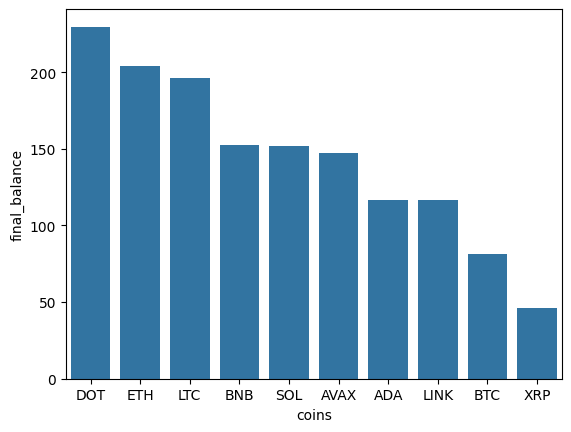

In [2]:
sns.barplot(df_results.sort_values(["final_balance"], ascending = False), x='coins', y="final_balance")

## Performance algo

<Axes: xlabel='coins', ylabel='performance_algo'>

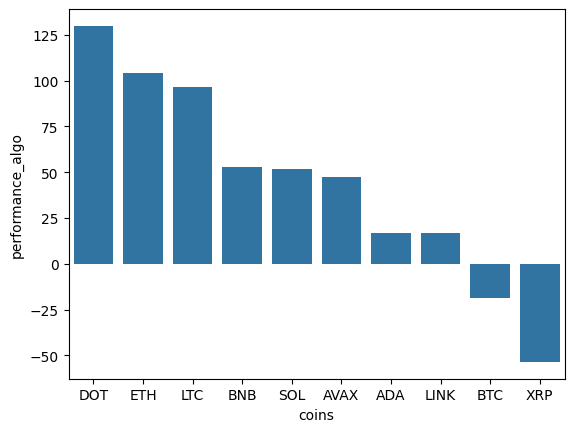

In [3]:
sns.barplot(df_results.sort_values(["performance_algo"], ascending = False), x='coins', y="performance_algo")

## Average trades results

In [4]:
# sns.barplot(df_results.sort_values(["avg_pct_positive_trades"], ascending = False), x='coins', y="avg_pct_positive_trades")

<Axes: xlabel='coins', ylabel='avg_pct_negative_trades'>

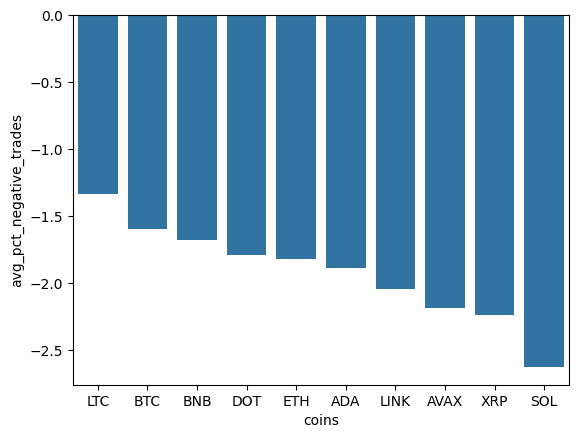

In [5]:
sns.barplot(df_results.sort_values(["avg_pct_negative_trades"], ascending = False), x='coins', y="avg_pct_negative_trades")

## Win rate

<Axes: xlabel='coins', ylabel='win_rate'>

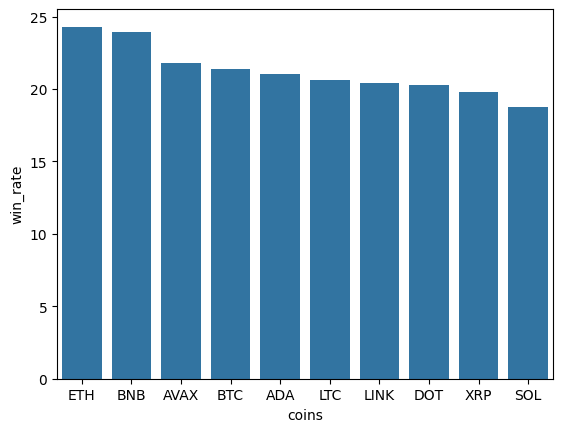

In [6]:
sns.barplot(df_results.sort_values(["win_rate"], ascending = False), x='coins', y="win_rate")

## Total trades

<Axes: xlabel='coins'>

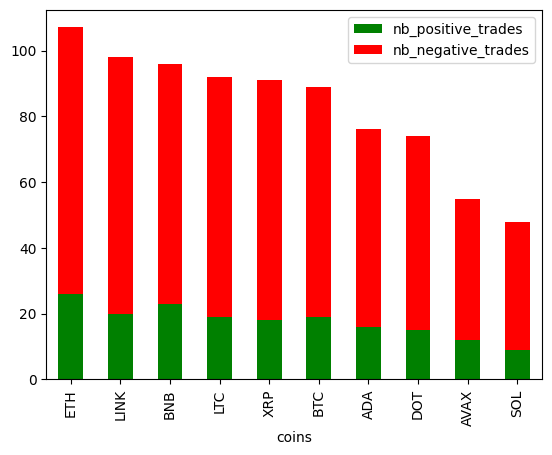

In [7]:
df_temp = df_results.sort_values(["total_trades"], ascending = False)
df_temp[["coins","nb_positive_trades", "nb_negative_trades"]].plot(kind="bar", stacked = True, x= "coins", color = ["green", "red"])

In [8]:
df_results["detail"].iloc[0]
all_details_df = [df_results["detail"].iloc[i] for i in range(len(df_results))]
global_details = pd.concat(all_details_df)

## Wallet details

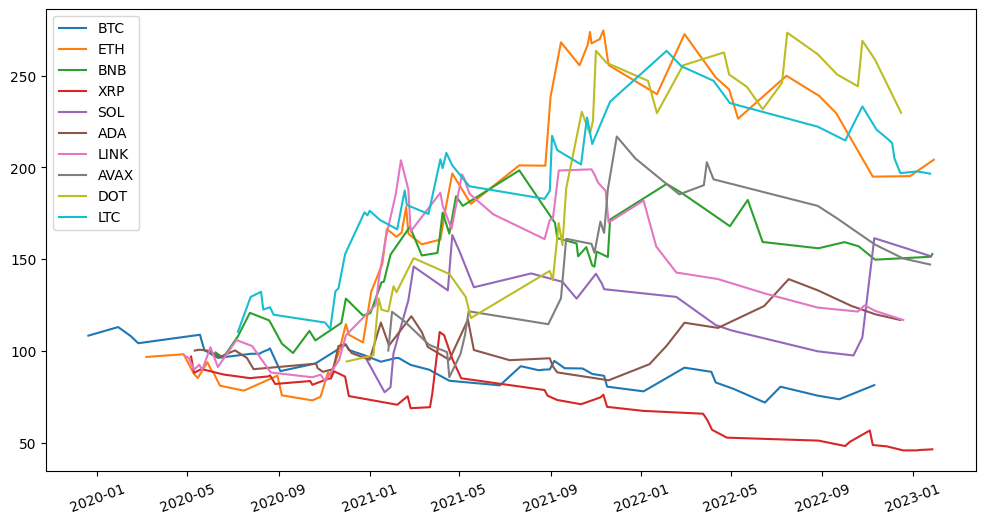

In [9]:
for coin in global_details["coin_name"].unique():
    temp_data = global_details[(global_details["coin_name"] == coin) & (global_details["position"] == "SELL")]
    plt.plot(temp_data["date"],
             temp_data["wallet"], label = coin)
plt.legend(loc="upper left")
plt.xticks(rotation = 20)
fig=plt.gcf()
fig.set_size_inches(12, 6)

## Global wallet

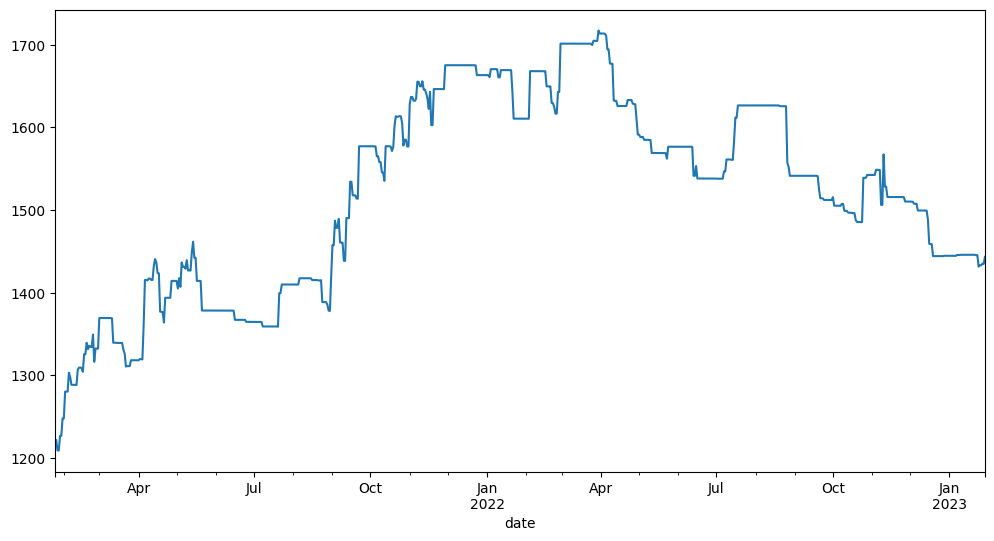

In [10]:
all_wallets = []
for coin_name in global_details["coin_name"].unique():
    temp_data = global_details[global_details["coin_name"] == coin_name]
    temp_data.index = pd.to_datetime(temp_data.date)
    temp_data = temp_data.resample("D").ffill()[["wallet"]]
    temp_data = temp_data.rename(columns = {"wallet" : "wallet_"+coin_name})
    all_wallets.append(temp_data)

df_wallets = pd.concat(all_wallets, axis = 1).ffill()
df_wallets = df_wallets.dropna()
wallet_ts = df_wallets.sum(axis = 1)
wallet_ts.plot()
fig=plt.gcf()
fig.set_size_inches(12, 6)
